In [20]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [21]:
# It takes an individual (a list of numbers) and returns the negative sum of the squares of the differences between each number and 0.5. 
# This is the minimize function, so the result is negated.
def fitness(individual):
    # Calculate the sum of the squares of the differences between each number and 0.5
    sum_of_squares = sum((np.array(individual) - 0.5)**2)

    # Calculate the standard deviation of the individual
    std_dev = np.std(individual)

    # Return the negative sum of squares plus the standard deviation
    # The standard deviation is added to reward individuals with more variation
    return -sum_of_squares + std_dev,

In [22]:
# Define the individual and population
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

/Users/miko866/Desktop/Unicorn/AI/uloha4/EvolutionaryTerrainGeneration/.venv/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/miko866/Desktop/Unicorn/AI/uloha4/EvolutionaryTerrainGeneration/.venv/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [23]:
toolbox = base.Toolbox()
toolbox.register("attr_float", random.random)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=15)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Define the evaluation, selection, mutation and crossover
toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=1, sigma=0.3, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

# Increase the mutation probability and the standard deviation of the Gaussian distribution
mutation_probability, sigma = 0.4, 1.0
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=sigma, indpb=mutation_probability)

In [24]:
def main():
    crossover_probability , generations = 0.5, 20
    population = toolbox.population(n=generations)

    #This evaluates the fitness of each individual in the population.
    current_fitness = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, current_fitness):
        ind.fitness.values = fit

    for g in range(generations):
        # Select and clone the next generation individuals
        offspring = map(toolbox.clone, toolbox.select(population, len(population)))

        # Apply crossover
        offspring = algorithms.varAnd(offspring, toolbox, crossover_probability, mutation_probability)

        # Evaluate individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        current_fitness = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, current_fitness):
            ind.fitness.values = fit

        # Replace population
        population[:] = offspring

        # Plot the best individual of this generation
        best_in_gen = tools.selBest(population, 1)[0]
        x = np.linspace(0, 1, 15)
        y = np.array(best_in_gen)

        # Calculate the water and land areas
        water_area = sum(min(y_i, 0.5) for y_i in y)
        land_area = sum(max(y_i - 0.5, 0) for y_i in y)
        total_area = water_area + land_area

        # Calculate the percentages
        water_percentage = (water_area / total_area) * 100
        land_percentage = (land_area / total_area) * 100

        plt.figure()
        plt.plot(x, np.ones_like(x)*0.5, label=f'Water area: {water_percentage:.2f}%')
        plt.plot(x, y, label=f'Land area: {land_percentage:.2f}%')
        plt.fill_between(x, y, 0.5, color='blue', alpha=0.5)  # Fill the water area with blue color
        plt.fill_between(x, y, 0, color='#763C28', alpha=0.5)  # Fill the landscape with henna color
        plt.ylim([0, 1])
        plt.legend()
        plt.title(f'Generation {g+1}')
        plt.show()

    return best_in_gen

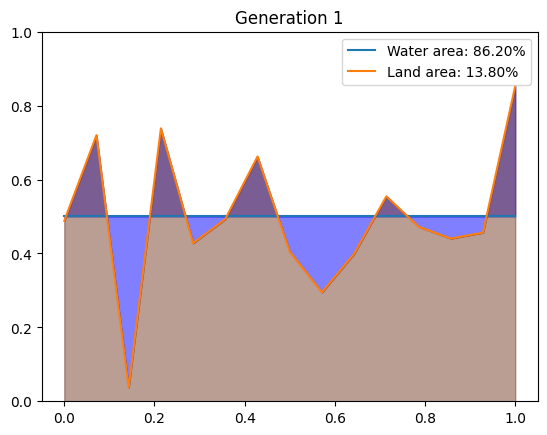

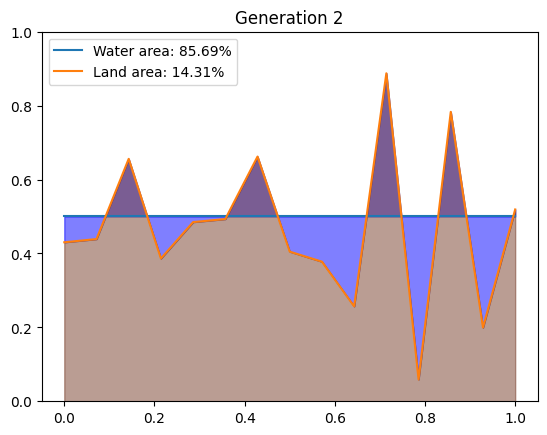

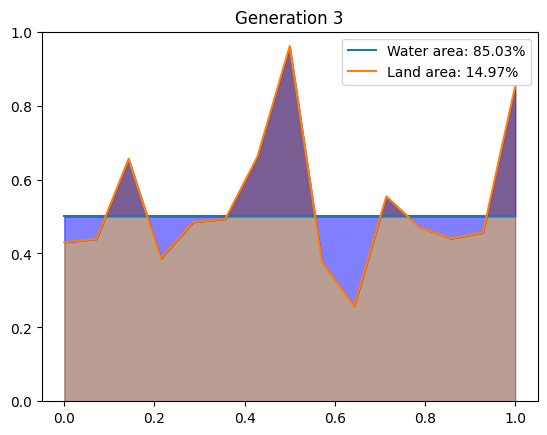

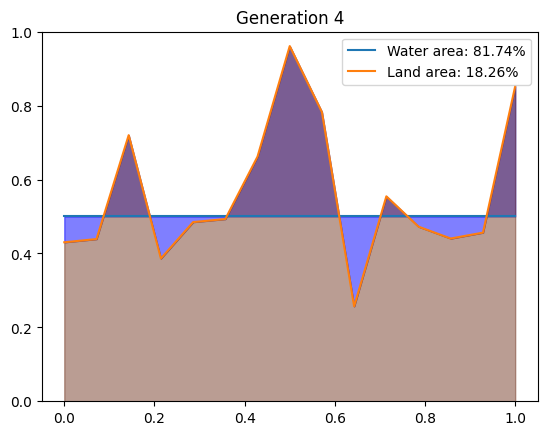

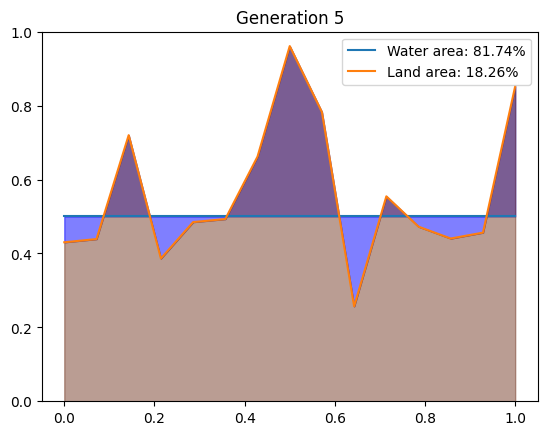

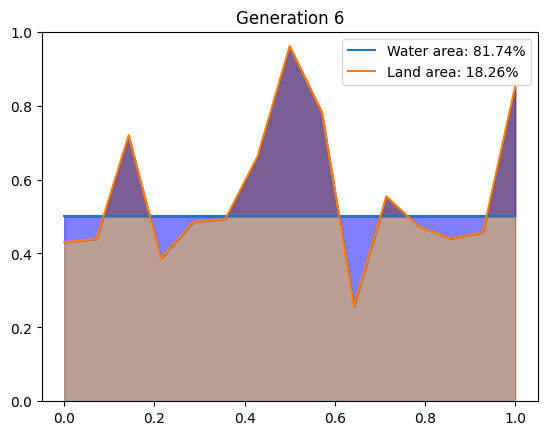

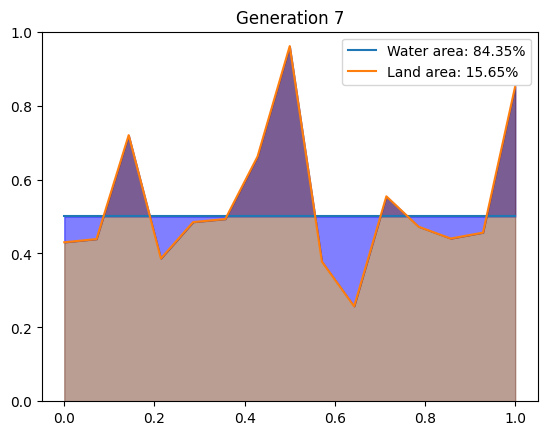

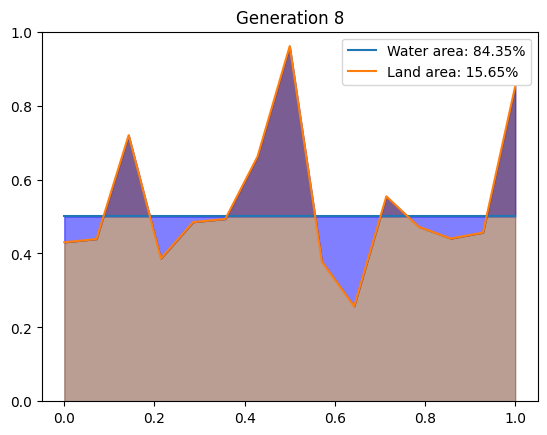

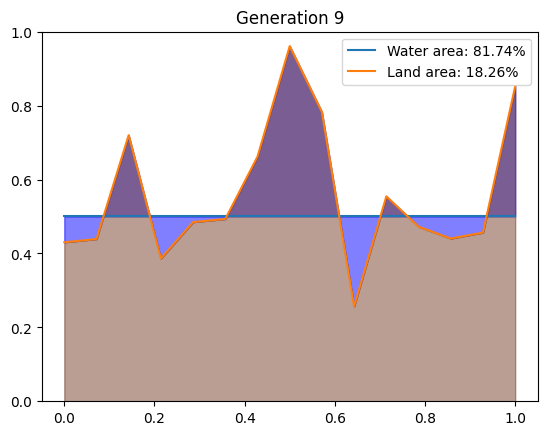

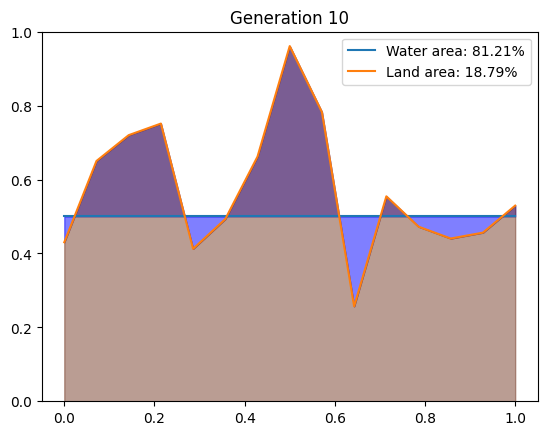

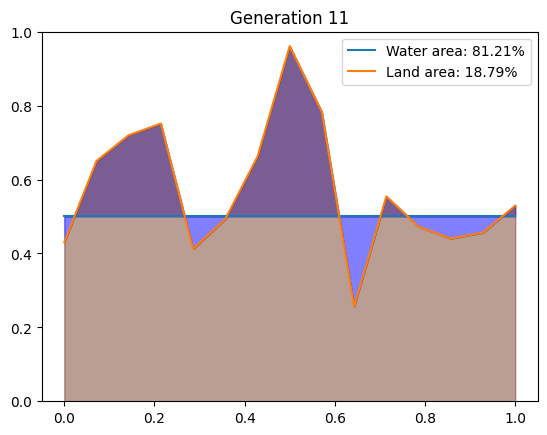

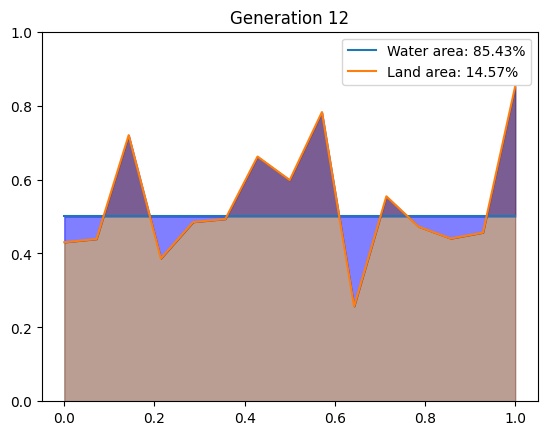

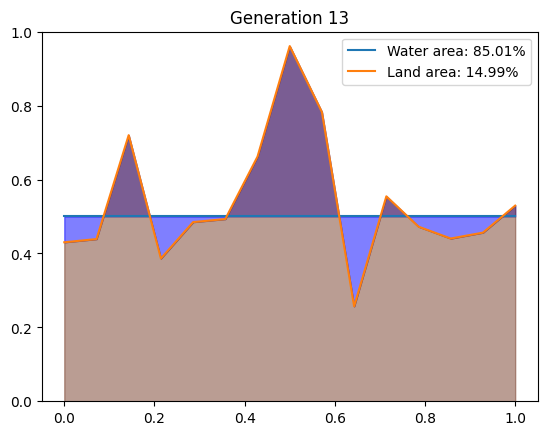

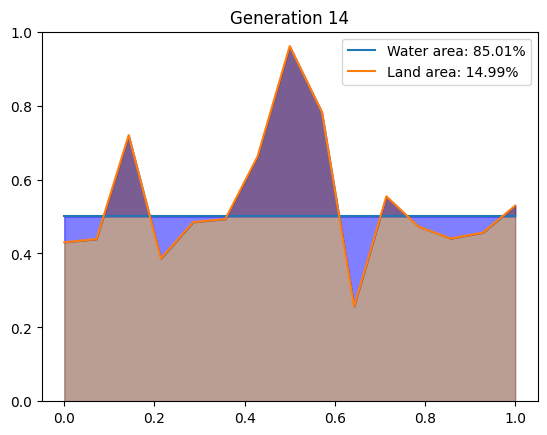

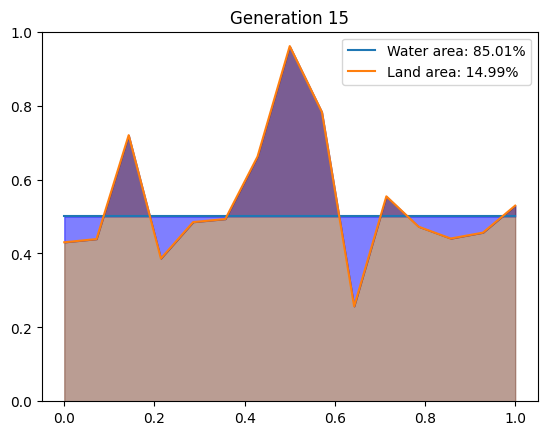

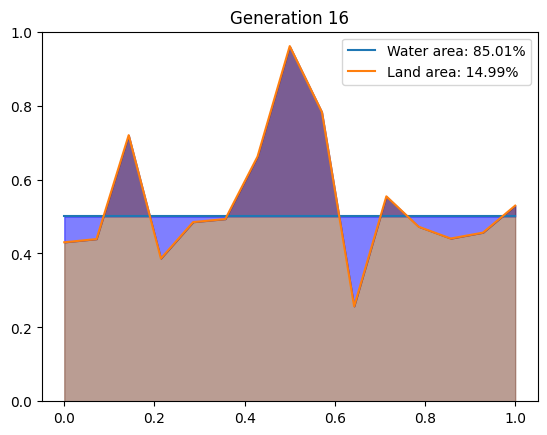

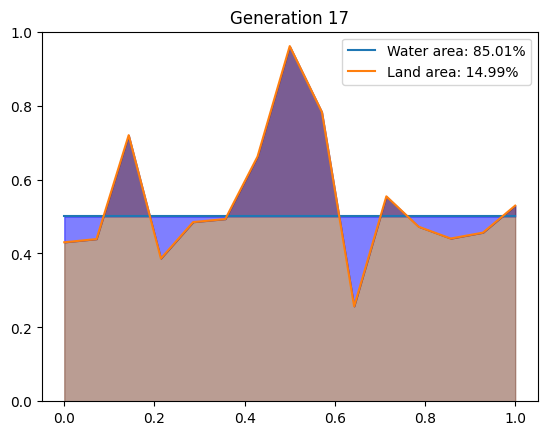

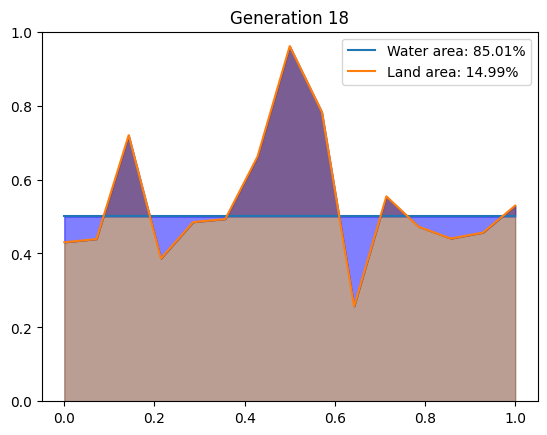

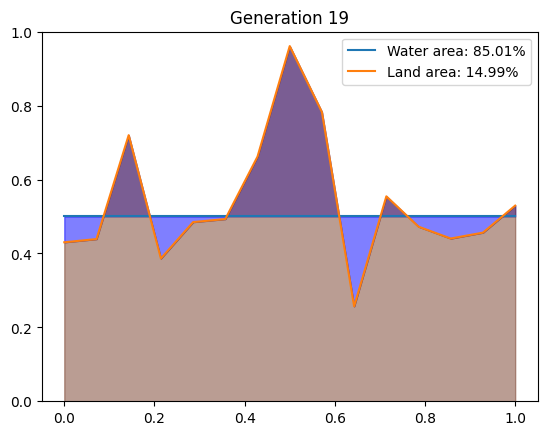

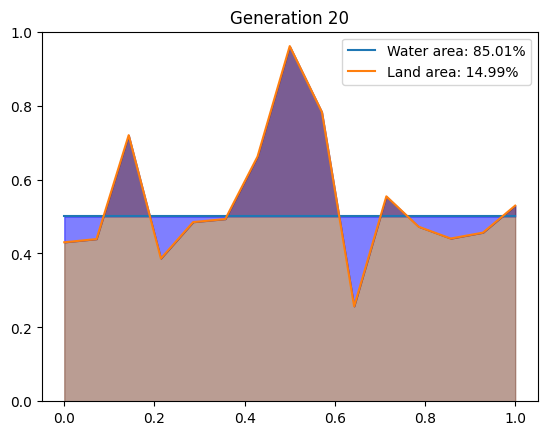

In [25]:
if __name__ == "__main__":
    best = main()